<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 
Анализ данных

# Ultra Pro

Возьмите базу квартир (moscow_parsed_simple.csv). Проведите парсинг и очистку данных. Переведите все параметры в числовой формат и рассчитайте корреляцию. Напишите выводы.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# импортируем библиотеки
import seaborn as sns
import pandas as pd
from tensorflow.keras import utils 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'svg' 

In [ ]:
# загрузим базу
df = pd.read_csv('/content/drive/MyDrive/data/moscow_parsed_simple.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0
126264,126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0
126265,126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0
126266,126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0


In [ ]:
# удалим первый столбец и посмотрим общую информацию о датафрейме
df.drop(df.columns[[0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126268 entries, 0 to 126267
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Комнат                    126262 non-null  object 
 1   Метро / ЖД станции        125934 non-null  object 
 2   От станции                124539 non-null  object 
 3   Дом                       126268 non-null  object 
 4   Балкон                    48069 non-null   object 
 5   Санузел                   79559 non-null   object 
 6   Площадь                   126268 non-null  object 
 7   Цена, руб.                126268 non-null  float64
 8   ГРМ                       2108 non-null    object 
 9   Бонус агенту              1252 non-null    object 
 10  Дата                      126268 non-null  object 
 11  Кол-во дней в экспозиции  126231 non-null  float64
dtypes: float64(2), object(10)
memory usage: 11.6+ MB


# Функции

In [ ]:
def getRoom(arg):
    """Функция для группировки квартир по комнатам.
    Все квартиры, где больше 5 комнат сгруппируем в одну категорию.
    Все квартиры, в которых продают одну или больше комнат, также сгруппируем в одну категорию.       
    """
    try:
        arg = int(arg)
        arg = str(arg)
        if arg.isdigit():
            if int(arg) < 6:
                return arg
            else:
                return 'больше 5'
    except:
        arg = str(arg)
        if arg == 'Ст':
            return arg
        else:
            return 'комната'


def metro(arg):
    """Функция возвращает район, в которой находится станция метро.
    Если метро рядом нет - возвращает станция
    """
    VAO = 'Щелковская Первомайская Измайловская Партизанская Семеновская \
           Электрозаводская Новокосино Новогиреево Перово Шоссе Энтузиастов \
           Бульвар Рокоссовского Черкизовская Преображенская площадь \
           Сокольники Выхино Андроновка Белокаменная Измайлово Локомотив \
           Соколиная Гора Улица Дмитриевского Лухмановская'
    ZAO = 'Крылатское Молодежная Кунцевская Славянский бульвар Парк Победы \
           Киевская Воробьевы Горы Университет Проспект Вернадского Тропарево \
           Юго-Западная Пионерская Филевский парк Багратионовская Кутузовская\
           Фили Студенческая Площадь Гагарина Мичуринский проспект Раменки \
           Солнцево Ломоносовский проспект Минская Озерная Новопеределкино \
           Боровское шоссе'
    SAO = 'Савеловская Ховрино Беломорская Речной вокзал Водный стадион Сокол \
           Войковская Аэропорт Динамо Полежаевская Беговая Тимирязевская \
           Петровско-Разумовская Окружная Коптево Балтийская Стрешнево \
           Панфиловская Зорге Хорошево Петровский парк ЦСКА Хорошевская \
           Хорошевское Селигерская Верхние Лихоборы'
    SZAO = 'Планерная Сходненская Тушинская Октябрьское поле Спартак Щукинская \
            Пятницкое шоссе Митино Строгино Волоколамская'
    SVAO = 'Медведково Бабушкинская Свиблово Ботанический сад Алексеевская \
            ВДНХ Алтуфьево Бибирево Отрадное Владыкино Дмитровская Телецентр \
            Улица Сергея Эйзенштейна Улица академика Королева Выставочный центр \
            Улица Милашенкова Ростокино Марьина Роща Фонвизинская Мякинино \
            Бутырская'
    CAO = 'Смоленская Арбатская Площадь Революции Курская Бауманская Маяковская \
           Белорусская Тверская Театральная Новокузнецкая Павелецкая Рижская \
           Третьяковская Марксистская Площадь Ильича Проспект Мира Сухаревская \
           Тургеневская Китай-Город Октябрьская Новослободская Комсомольская \
           Таганская Добрынинская Парк культуры Краснопресненская Менделеевская \
           Цветной бульвар Чеховская Боровицкая Полянка Серпуховская Лубянка \
           Чистые пруды Красные ворота Красносельская Охотный ряд Фрунзенская \
           Кропоткинская Библиотека им.Ленина Спортивная Улица 1905 года \
           Баррикадная Пушкинская Кузнецкий мост Пролетарская Деловой центр \
           Шелепиха Александровский Сад Лужники Сретенский бульвар Международная \
           Выставочная Римская Достоевская Трубная Чкаловская Крестьянская Застава'
    UVAO = 'Авиамоторная Дубровка Кожуховская Печатники Волжская Братиславская \
            Люблино Марьино Волгоградский проспект Кузьминки Рязанский проспект \
            Текстильщики Угрешская Новохохловская Нижегородская Андроновка \
            Котельники Косино Нижегородская улица Некрасовка Жулебино \
            Лермонтовский проспект Стахановская Окская улица Юго-Восточная'
    UZAO = 'Битцевский парк Академическая Беляево Калужская Коньково Ясенево \
            Теплый стан Профсоюзная Новые Черемушки Новоясеневская Каховская \
            Ленинский проспект Бульвар Дмитрия Донского Нахимовский проспект \
            Севастопольская Чертановская Крымская Бунинская аллея \
            Улица Скобелевская Улица Горчакова Улица Старокачаловская \
            Бульвар Адмирала Ушакова'
    UAO = 'Автозаводская Технопарк Коломенская Каширская Кантемировская Орехово \
           Царицыно Домодедовская Красногвардейская Алма-Атинская Шаболовская \
           Варшавская Тульская Нагатинская Нагорная Южная Пражская Аннино \
           Улица Академика Янгеля Верхние Котлы ЗИЛ Зябликово Лесопарковая \
           Шипиловская Борисово'
    NAO = 'Румянцево Саларьево Филатов луг Прокшино Ольховая Коммунарка \
           Рассказовка Говорово Столбово'

    arg = str(arg)
    if ' м. (МЦК)' in arg:
        arg = arg.replace(' м. (МЦК)', '')
    elif ' м.' in arg:
        arg = arg.replace(' м.', '')
    elif 'метро' in arg:
        arg = arg.replace(' метро', '')
    
    if arg in VAO: return 'ВАО'
    elif arg in ZAO: return 'ЗАО'
    elif arg in SAO: return 'САО'
    elif arg in SZAO: return 'СЗАО'
    elif arg in SVAO: return 'СВАО'
    elif arg in CAO: return 'ЦАО'
    elif arg in UVAO: return 'ЮВАО'
    elif arg in UZAO: return 'ЮЗАО'
    elif arg in UAO: return 'ЮАО'
    elif arg in NAO: return 'НАО'

    if 'станция' in arg: return 'жд станция'
    else: return 'Неизвестно'

    return arg


def distance(arg):
    """Функция группирует квартиры на три типа по расстоянию до метро"""
    arg = str(arg)
    if str(arg[-1]) == 'п' and int(arg[:-1]) <= 2:
        return 'Рядом'
    elif (str(arg[-1]) == 'п' and 2 < int(arg[:-1]) <= 15) or \
         (str(arg[-1]) == 'т' and int(arg[:-1]) <= 10):
         return 'Близко'
    else:
        return 'Далеко'


def getFloor(arg):
    """Функция создает колонку с данными по этажу в квартире"""
    arg = str(arg).split(' ')
    return arg[0]


def getTypeHouse(arg):
    """Функция расшифровывает буквенное значение типа дома"""
    arg = str(arg).split(' ')
    if arg[1] == "М":
        return 'монолитный'
    elif arg[1] == "П":
        return 'панельный'
    elif arg[1] == "К":
        return 'кирпичный'
    elif arg[1] == "М-К":
        return 'монолитно-кирпичный'
    elif arg[1] == "Б":
        return 'блочный'
    elif arg[1] == "Стал.":
        return 'сталинский'
    else:
        return 'нет данных'


def getBalcony(arg):
    """Функция группирует квартиры по наличию и типу балкона"""
    arg = str(arg)
    if 'Л' in arg and 'Б' not in arg:
        return 'балкон'
    elif 'Б' in arg and 'Л' not in arg:
        return 'лоджия'
    elif 'Л' in arg and 'Б' in arg:
        return 'балкон и лоджия'
    elif '-' in arg:
        return 'отсутствует'
    else:
        return 'нет данных'


def getWashroom(arg):
    """Функция группирует квартиры по наличию и типу санузла"""
    arg = str(arg)
    if 'С' in arg:
        return 'совмещенный'
    elif 'Р' in arg or arg.isdigit() or '+' in arg:
        return 'раздельный'
    elif '-' in arg:
        return 'отсутствует'
    else:
        return 'нет данных'


def square(arg):
    """Функция возвращает значение площади, если есть"""
    arg = arg.split('/')
    if len(arg[0]) > 7:
        return '0'
    if arg[0] != '?':
        return arg[0]
    elif arg[1] != '?':
        return arg[1]
    else:
        return '0'

# Парсинг и очистка данных

In [ ]:
# проверим на наличие дублирующих строк
df[df.duplicated(subset = ['Комнат', 'Метро / ЖД станции', 'Дом', 'Площадь', 'Цена, руб.'], keep=False)]

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
8,1,Марьина Роща м.,10п,7/14 П,2Б,NaN,38.9/20.9/8.5,8900000.0,NaN,NaN,25.07.2019,16.0
11,1,Печатники м.,5т,2/12 П,-,С,35/19/9,5200000.0,NaN,NaN,25.07.2019,18.0
15,1,Площадь Ильича м.,8п,1/10 М,-,С,31.5/12/10.4,6840300.0,NaN,NaN,25.07.2019,21.0
19,1,Площадь Ильича м.,8п,10/28 М,Б,С,36.6/11.3/12.7,8265000.0,NaN,NaN,25.07.2019,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
126256,Ст,Бибирево м.,14п,1/12 П,NaN,Р,12.9/9.9/?,2550000.0,NaN,NaN,16.07.2019,14.0
126257,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.5/18.5/?,3840000.0,NaN,NaN,23.07.2019,14.0
126258,Ст,Комсомольская м.,11п,1/3 К,NaN,С,23.5/?/?,5290000.0,NaN,NaN,25.07.2019,14.0
126262,Ст,Волжская м.,13п,1/5 К,NaN,Р,20.6/?/?,3290000.0,NaN,NaN,24.07.2019,14.0


In [ ]:
# удалим дублирующие строки
df = df.drop_duplicates(subset = ['Комнат', 'Метро / ЖД станции', 'Дом', 'Площадь', 'Цена, руб.'])
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
105168,Ст,Волжская м.,13п,1/5 К,NaN,С,20.6/?/?,3289995.0,NaN,NaN,24.07.2019,14.0
105169,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0
105170,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0
105171,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0


### Комнаты

In [ ]:
# посмотрим количество квартир по количеству комнат
df['Комнат'].value_counts()

1.0       49754
2         32454
Ст         7546
5          6216
2.0        2989
6          2542
01.мар     1383
01.апр      498
01.фев      437
7           419
8           177
02.мар      177
01.май       87
9            74
02.апр       67
01.июн       62
10           56
01.янв       49
03.апр       23
01.июл       21
02.май       18
1            18
02.июн       14
12           10
01.сен        9
03.май        9
14            8
11            8
04.май        8
13            4
03.июн        4
15            4
02.июл        4
20            2
4             2
01.окт        2
04.июн        2
16            2
03.авг        2
01.дек        1
30            1
03.мар        1
03.июл        1
02.фев        1
01.авг        1
05.июн        1
Name: Комнат, dtype: int64

In [ ]:
# сгруппируем квартирыпо количеству комнат
df['Комнат'] = df['Комнат'].apply(getRoom)
df['Комнат'].value_counts()

1           49772
2           35443
Ст           7546
5            6216
больше 5     3307
комната      2887
4               2
Name: Комнат, dtype: int64

### Метро / ЖД станции

In [ ]:
# станции метро сгруппируем по районам Москвы
df['Район'] = df['Метро / ЖД станции'].apply(metro)
df['Район'].value_counts()

ЦАО           15928
ЗАО           13785
САО           13011
ЮВАО          12750
СВАО           9553
ЮЗАО           9115
ЮАО            8872
НАО            8028
ВАО            6688
СЗАО           6220
жд станция      896
Неизвестно      327
Name: Район, dtype: int64

### Расстояние до станции

In [ ]:
# расстояние до метро/жд станции сгруппируем:
df['Расстояние до станции'] = df['От станции'].apply(distance)
df['Расстояние до станции'].value_counts()

Близко    85537
Далеко    17283
Рядом      2353
Name: Расстояние до станции, dtype: int64

### Тип дома

In [ ]:
# создадим новый столбец "Этаж" и заполним его числовыми значениями из столбца "Дом"
df['Этаж'] = df['Дом'].apply(getFloor)
# заменим значения в столбце "Дом" типом дома
df['Дом'] = df['Дом'].apply(getTypeHouse)
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Район,Расстояние до станции,Этаж
0,1,Шелепиха м.,12п,монолитный,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,ЦАО,Близко,35/37
1,1,Пятницкое шоссе м.,30т,панельный,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,СЗАО,Далеко,11/14
2,1,Планерная м.,5т,панельный,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,СЗАО,Близко,11/22
3,1,Шаболовская м.,12п,нет данных,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0,ЮАО,Близко,8/12
4,1,Бабушкинская м.,15п,панельный,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0,СВАО,Близко,4/14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105168,Ст,Волжская м.,13п,кирпичный,NaN,С,20.6/?/?,3289995.0,NaN,NaN,24.07.2019,14.0,ЮВАО,Близко,1/5
105169,Ст,Некрасовка м.,4п,панельный,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0,ЮВАО,Близко,2/17
105170,Ст,Авиамоторная м.,6п,кирпичный,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0,ЮВАО,Близко,2/8
105171,Ст,Алтуфьево м.,5т,монолитный,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0,СВАО,Близко,4/9


In [ ]:
df['Дом'].value_counts()

монолитный             37096
панельный              24950
нет данных             16791
кирпичный              14879
монолитно-кирпичный     7973
блочный                 2960
сталинский               524
Name: Дом, dtype: int64

### Балкон

In [ ]:
df['Балкон'].value_counts()

Л       19105
Б       15122
-        2295
2Л       1381
БЛ       1212
2Б        939
3Л        167
3Б        115
4Л         64
2Б2Л       59
Б2Л        37
Эрк        17
ЭркЛ        4
*Л          2
*Б          1
Name: Балкон, dtype: int64

In [ ]:
# сгруппируем квартиры на 5 типов: с балконом, с лоджией, с балконом и лоджией, ничего нет и нет данных
df['Балкон'] = df['Балкон'].apply(getBalcony)
df['Балкон'].value_counts()

нет данных         64670
балкон             20723
лоджия             16177
отсутствует         2295
балкон и лоджия     1308
Name: Балкон, dtype: int64

### Санузел

In [ ]:
df['Санузел'].value_counts()

С     35177
Р     20528
2      3386
2С     1368
2Р      938
3       648
3С      576
-       545
3Р      363
4С      359
4       341
4Р      337
+       308
Name: Санузел, dtype: int64

In [ ]:
# сгруппируем по санузлу на 4 типа: совмещенный, раздельный, отсутствует и нет данных
df['Санузел'] = df['Санузел'].apply(getWashroom)
df['Санузел'].value_counts()

нет данных     40299
совмещенный    37480
раздельный     26849
отсутствует      545
Name: Санузел, dtype: int64

### Площадь

In [ ]:
# в столбце "Площадь" оставим только первое значение - общую площадь
df['Площадь'] = df['Площадь'].apply(square)
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Район,Расстояние до станции,Этаж
0,1,Шелепиха м.,12п,монолитный,нет данных,раздельный,64.1,19500000.0,NaN,NaN,25.07.2019,1.0,ЦАО,Близко,35/37
1,1,Пятницкое шоссе м.,30т,панельный,балкон,раздельный,38.4,4800000.0,NaN,NaN,25.07.2019,2.0,СЗАО,Далеко,11/14
2,1,Планерная м.,5т,панельный,лоджия,совмещенный,38.2,7990000.0,NaN,NaN,25.07.2019,4.0,СЗАО,Близко,11/22
3,1,Шаболовская м.,12п,нет данных,лоджия,раздельный,38,11200000.0,NaN,NaN,25.07.2019,7.0,ЮАО,Близко,8/12
4,1,Бабушкинская м.,15п,панельный,нет данных,совмещенный,34,6250000.0,NaN,NaN,25.07.2019,11.0,СВАО,Близко,4/14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105168,Ст,Волжская м.,13п,кирпичный,нет данных,совмещенный,20.6,3289995.0,NaN,NaN,24.07.2019,14.0,ЮВАО,Близко,1/5
105169,Ст,Некрасовка м.,4п,панельный,нет данных,нет данных,19.8,2850000.0,NaN,NaN,12.07.2019,14.0,ЮВАО,Близко,2/17
105170,Ст,Авиамоторная м.,6п,кирпичный,нет данных,совмещенный,20.4,3839990.0,NaN,NaN,23.07.2019,14.0,ЮВАО,Близко,2/8
105171,Ст,Алтуфьево м.,5т,монолитный,нет данных,нет данных,26,5200000.0,NaN,NaN,22.07.2019,14.0,СВАО,Близко,4/9


### Цена

In [ ]:
# значения в столбце "Цена" переведем в миллионы рублей
df['Цена, руб.'] = df['Цена, руб.'].apply(lambda x: round(x/1000000, 2))
df = df.rename(columns = {'Цена, руб.':'Цена, млн руб.'})
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, млн руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Район,Расстояние до станции,Этаж
0,1,Шелепиха м.,12п,монолитный,нет данных,раздельный,64.1,19.50,NaN,NaN,25.07.2019,1.0,ЦАО,Близко,35/37
1,1,Пятницкое шоссе м.,30т,панельный,балкон,раздельный,38.4,4.80,NaN,NaN,25.07.2019,2.0,СЗАО,Далеко,11/14
2,1,Планерная м.,5т,панельный,лоджия,совмещенный,38.2,7.99,NaN,NaN,25.07.2019,4.0,СЗАО,Близко,11/22
3,1,Шаболовская м.,12п,нет данных,лоджия,раздельный,38,11.20,NaN,NaN,25.07.2019,7.0,ЮАО,Близко,8/12
4,1,Бабушкинская м.,15п,панельный,нет данных,совмещенный,34,6.25,NaN,NaN,25.07.2019,11.0,СВАО,Близко,4/14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105168,Ст,Волжская м.,13п,кирпичный,нет данных,совмещенный,20.6,3.29,NaN,NaN,24.07.2019,14.0,ЮВАО,Близко,1/5
105169,Ст,Некрасовка м.,4п,панельный,нет данных,нет данных,19.8,2.85,NaN,NaN,12.07.2019,14.0,ЮВАО,Близко,2/17
105170,Ст,Авиамоторная м.,6п,кирпичный,нет данных,совмещенный,20.4,3.84,NaN,NaN,23.07.2019,14.0,ЮВАО,Близко,2/8
105171,Ст,Алтуфьево м.,5т,монолитный,нет данных,нет данных,26,5.20,NaN,NaN,22.07.2019,14.0,СВАО,Близко,4/9


In [ ]:
# удалим лишние столбцы
df.drop(['Метро / ЖД станции', 'От станции', 'ГРМ', 'Бонус агенту', 'Дата', 'Кол-во дней в экспозиции', 'Этаж'], axis=1, inplace=True)
df.head(5)

,Комнат,Дом,Балкон,Санузел,Площадь,"Цена, млн руб.",Район,Расстояние до станции
0,1,монолитный,нет данных,раздельный,64.1,19.50,ЦАО,Близко
1,1,панельный,балкон,раздельный,38.4,4.80,СЗАО,Далеко
2,1,панельный,лоджия,совмещенный,38.2,7.99,СЗАО,Близко
3,1,нет данных,лоджия,раздельный,38,11.20,ЮАО,Близко
4,1,панельный,нет данных,совмещенный,34,6.25,СВАО,Близко


# Работа с базой

### Кодируем базу для подсчета корреляций

In [ ]:
# данные о количестве комнат
def getParameterRoom(arg):
    if arg == '1':
        out = 0
    if arg == '2':
        out = 1
    if arg == '4':
        out = 2
    if arg == '5':
        out = 3
    if arg == 'Ст':
        out = 4
    if arg == 'комната':
        out = 5
    if arg == 'больше 5':
        out = 6
    
    return list(utils.to_categorical(out, 7).astype('int'))


# данные о типе дома
def getParameterTypeHouse(arg):
    if arg == 'монолитный':
        out = 0
    if arg == 'панельный':
        out = 1
    if arg == 'кирпичный':
        out = 2
    if arg == 'монолитно-кирпичный':
        out = 3
    if arg == 'блочный':
        out = 4
    if arg == 'сталинский':
        out = 5
    if arg == 'нет данных':
        out = 6

    return list(utils.to_categorical(out, 7).astype('int'))


# данные о балконе
def getParameterBalcony(arg):
    if arg == 'нет данных':
        out = 0
    if arg == 'балкон':
        out = 1
    if arg == 'лоджия':
        out = 2
    if arg == 'отсутствует':
        out = 3
    if arg == 'балкон и лоджия':
        out = 4

    return list(utils.to_categorical(out, 5).astype('int'))


# данные о типе санузла
def getParameterWashroom(arg):
    if arg == 'нет данных':
        out = 0
    if arg == 'совмещенный':
        out = 1
    if arg == 'раздельный':
        out = 2
    if arg == 'отсутствует':
        out = 3

    return list(utils.to_categorical(out, 4).astype('int'))


# данные о площади
def getParameterSquare(arg):
    arg = float(arg)
    if arg <= 10:
        out = 0
    if arg > 10:
        out = 1
    if arg > 20:
        out = 2
    if arg > 30:
        out = 3
    if arg > 40:
        out = 4
    if arg > 50:
        out = 5
    if arg > 60:
        out = 6
    if arg > 80:
        out = 7
    if arg > 100:
        out = 8
    if arg > 150:
        out = 9
    if arg > 300:
        out = 10

    return list(utils.to_categorical(out, 11).astype('int'))


# данные о районе
def getParameterDistrict(arg):
    if arg == 'ЦАО':
        out = 0
    if arg == 'ЗАО':
        out = 1
    if arg == 'САО':
        out = 2
    if arg == 'ЮВАО':
        out = 3
    if arg == 'СВАО':
        out = 4
    if arg == 'ЮЗАО':
        out = 5
    if arg == 'ЮАО':
        out = 6
    if arg == 'НАО':
        out = 7
    if arg == 'ВАО':
        out = 8
    if arg == 'СЗАО':
        out = 9
    if arg == 'жд станция':
        out = 10
    if arg == 'Неизвестно':
        out = 11
    
    return list(utils.to_categorical(out, 12).astype('int'))


# данные о дальности до метро
def getParameterDistance(arg):
    if arg == 'Рядом':
        out = 0
    if arg == 'Близко':
        out = 1
    if arg == 'Далеко':
        out = 2

    return list(utils.to_categorical(out, 3).astype('int'))

In [ ]:
# извлекаем все параметры
def getAllParameters(val):
    room = getParameterRoom(val[0])
    typeHouse = getParameterTypeHouse(val[1])
    balcony = getParameterBalcony(val[2])
    washroom = getParameterWashroom(val[3])
    square = getParameterSquare(val[4])
    district = getParameterDistrict(val[6])
    distance = getParameterDistance(val[7])
    out = []

# Склеиваем все параметры в вектор
    out += room
    out += typeHouse
    out += balcony
    out += washroom
    out += square
    out += district
    out += distance
    
    return out


def get01Data(values):
    flat = [] # Здесь будем хранить кодированные значения
    price = [] # Здесь будем хранить данные о стоимости

    for val in values:
        y = val[5] # Цена
        x = getAllParameters(val)
        flat.append(x)
        price.append(y)

    flat = np.array(flat)
    price = np.array(price)

    return (flat, price)

In [ ]:
flats, price = get01Data(df.values)

In [ ]:
categorical = pd.DataFrame(
    {'Комнат': [np.argmax(i) for i in flats[:,0:7]],                                                                
     'Дом':[np.argmax(i) for i in flats[:,7:14]],
     'Балкон':[np.argmax(i) for i in flats[:,14:19]],
     'Санузел':[np.argmax(i) for i in flats[:,19:23]],
     'Площадь':[np.argmax(i) for i in flats[:,23:34]],
     'Район':[np.argmax(i) for i in flats[:,34:46]],
     'Расстояние до станции':[np.argmax(i) for i in flats[:,46:49]],
     'Цена':price})

categorical.head(10) # основные статистические данные по базе

,Комнат,Дом,Балкон,Санузел,Площадь,Район,Расстояние до станции,Цена
0,0,0,0,2,6,0,1,19.50
1,0,1,1,2,3,9,2,4.80
2,0,1,2,1,3,9,1,7.99
3,0,6,2,2,3,6,1,11.20
4,0,1,0,1,3,4,1,6.25
5,0,2,0,0,4,0,1,12.70
6,0,1,1,2,4,8,0,6.50
7,0,2,2,1,3,8,0,6.00
8,0,1,2,0,3,4,1,8.90
9,0,3,0,3,3,3,2,6.00


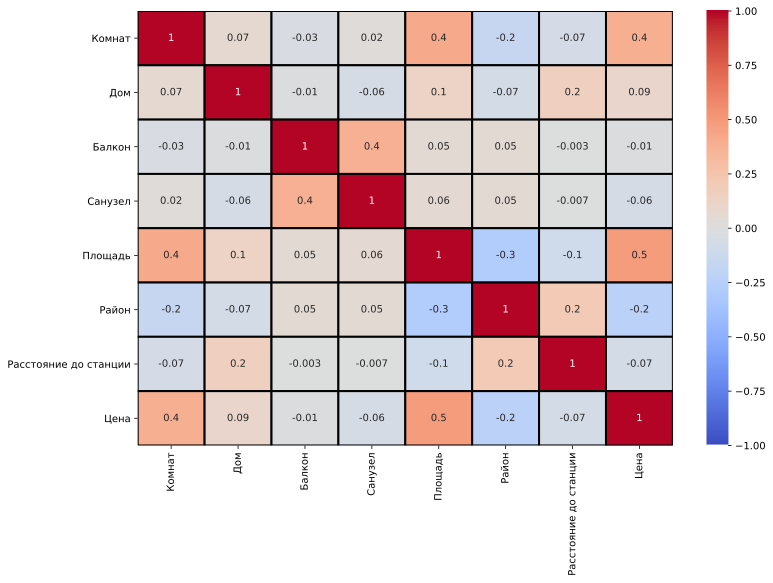

In [ ]:
# выведем матрицу корреляции Спирмена
plt.figure(figsize=(12,8))
corr_matrix = categorical.corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()     

По графику корреляций Спирмена можно сделать следующие выводы:


1.   Цена квартиры имеет высокую корреляцию с площадью квартиры
2.   Цена квартиры отрицательно коррелирует с районом



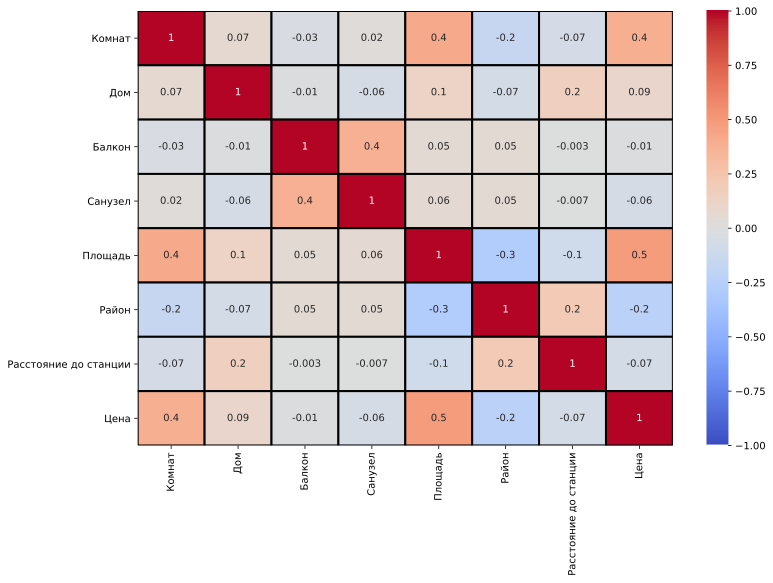

In [ ]:
# выведем матрицу корреляции Пирсона
plt.figure(figsize=(12,8))
corr_matrix = categorical.corr()
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()

По графику корреляций Пирсона можно сделать следующие выводы:


1.   Цена квартиры коррелирует с площадью квартиры и с количеством комнат
2.   Цена квартиры отрицательно коррелирует с районом

